In [176]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

# Task 1 Quantum Computing Part

## 1. Implement a simple quantum operation with Cirq

a) With 5 qubits

b) Apply Hadamard operation on every qubit

c) Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)

d) SWAP (0, 4)

e) Rotate X with pi/2 on any qubit

f) Plot the circuit 

In [29]:
circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(5) 

circuit.append([cirq.H(qubit) for qubit in qubits])
circuit.append([cirq.CNOT(qubits[i],qubits[i+1]) for i in range(len(qubits) - 1)])
circuit.append([cirq.SWAP(qubits[0], qubits[4])])
circuit.append([cirq.rx(np.pi)(qubit) for qubit in qubits])

print(circuit)

                                  ┌──────┐
0: ───H───@────────────────────────×─────────Rx(π)───
          │                        │
1: ───H───X───@───Rx(π)────────────┼─────────────────
              │                    │
2: ───H───────X───@───────Rx(π)────┼─────────────────
                  │                │
3: ───H───────────X───────@────────┼Rx(π)────────────
                          │        │
4: ───H───────────────────X────────×─────────Rx(π)───
                                  └──────┘


## 2. Create a circuit that is a series of small cirq.Rx rotations and plot the probability of measuring the state in the |0⟩ state. 

In [145]:
circuit2 = cirq.Circuit()
qubit = cirq.NamedQubit("q0")

circuit2.append([cirq.rx(np.pi/8)(qubit) for i in range(6)])
circuit2.append([cirq.measure(qubit, key='q0')])

print(circuit2)

q0: ───Rx(0.125π)───Rx(0.125π)───Rx(0.125π)───Rx(0.125π)───Rx(0.125π)───Rx(0.125π)───M───


Counter({1: 82, 0: 18})


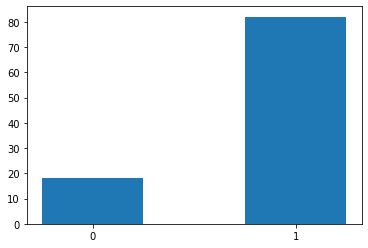

In [169]:
simulator = cirq.Simulator()
result = simulator.run(circuit2,repetitions=100)

print(result.histogram(key='q0'))

fig,ax = plt.subplots()
plt.xticks([0,1])
a=ax.hist(result.records['q0'][:,0,0], bins=[-0.25,0.25,0.75,1.25])

# Task II: Quantum Generative Adversarial Network (QGAN) Part 

You will explore how best to apply a quantum generative adversarial network (QGAN) to solve a High Energy Data analysis issue, more specifically, separating the signal events from the background events. You should use the Google Cirq and Tensorflow Quantum (TFQ) libraries for this task.

A set of input samples (simulated with Delphes) is provided in NumPy NPZ format [Download Input]. In the input file, there are only 100 samples for training and 100 samples for testing so it won’t take much computing resources to accomplish this task. The signal events are labeled with 1 while the background events are labeled with 0.

Be sure to show that you understand how to fine tune your machine learning model to improve the performance. The performance can be evaluated with classification accuracy or Area Under ROC Curve (AUC). 

In [267]:
with np.load('QIS_EXAM_200Events.npz',allow_pickle=True) as data:
    train = data['training_input'].item()
    test = data['test_input'].item()
    
    
    

{'0': array([[-0.43079088,  0.86834819, -0.92614721, -0.92662029, -0.56900862],
       [ 0.33924198,  0.56155499,  0.93097459, -0.91631726, -0.54463516],
       [-0.42888879,  0.87064961, -0.92782179, -0.77533991, -0.58329176],
       [-0.43262871,  0.86128919, -0.92240878, -0.88048862, -0.49963115],
       [-0.99925345, -0.99949586,  0.07753685, -0.84218034, -0.5149399 ],
       [-0.99631106, -0.99775978,  0.0756427 , -0.54117216, -0.66299335],
       [-0.42645921,  0.87141204, -0.92908723, -0.52650143, -0.62187526],
       [ 0.34317906,  0.57125045,  0.92638556, -0.85113425, -0.40170562],
       [-0.99904849, -0.99933931,  0.07737929, -0.81161066, -0.53550246],
       [ 0.3371327 ,  0.55874622,  0.92996976, -0.9117092 , -0.50996097],
       [ 0.89649306, -0.95523176, -0.66298651, -0.71276678, -0.62698893],
       [ 0.34293232,  0.56408047,  0.93448436, -0.88789589, -0.56154273],
       [-0.43055876,  0.86615566, -0.92532229, -0.82531102, -0.61433506],
       [ 0.33970589,  0.56676702